# Problem Statement:
 e-commerce platforms like BigBasket face challenges in helping users discover relevant products quickly and effectively. Traditional methods of product listing and search often fail to capture individual user preferences or the nuanced relationships between products. This can lead to poor user experience, decreased engagement, and missed opportunities for increasing sales.

# Objective:
To develop a content-based recommendation system for BigBasket’s product catalog using TF-IDF and cosine similarity. The goal is to generate personalized product recommendations by leveraging textual data, such as product descriptions and features. This system aims to enhance user experience by providing relevant suggestions, improving product discoverability, and driving customer satisfaction and sales.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('BigBasket Products.csv')
df

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
...,...,...,...,...,...,...,...,...,...,...
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori..."


# This dataset contains 10 attributes with simple meanings which are described as follows:
1. index - Simply the Index!
2. product - Title of the product (as they're listed)
3. category - Category into which product has been classified
4. sub_category - Subcategory into which the product has been kept
5. brand - Brand of the product
6. sale_price - The price at which the product is being sold on the site
7. market_price - The market price of the product
8.type - Type into which product falls
9.rating - Rating the product has got from its consumers

# Removing unwanted features and handling the null values in the data

In [3]:
df = df.drop(columns = ['index'])

In [4]:
df = df.dropna(subset=['description','brand','product'])

In [5]:
df.isnull().sum()

product            0
category           0
sub_category       0
brand              0
sale_price         0
market_price       0
type               0
rating          8599
description        0
dtype: int64

#Filling the nan values with the interpolation technique we have used interpolation technique in order to just fill the nan values the ratings column over here do not play a much important role but if we drop the rows with missing ratings we will lose some highly valuable information from the description feature so we just use interpolation method as a technique to fill the nan values in the ratings column

In [6]:
df['rating'] = df['rating'].interpolate(method='polynomial', order=2)

In [7]:
df.isnull().sum()

product         0
category        0
sub_category    0
brand           0
sale_price      0
market_price    0
type            0
rating          0
description     0
dtype: int64

In [8]:
df.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [9]:
print(df['category'].nunique())
print(df['sub_category'].nunique())
print(df['brand'].nunique())

11
90
2309


# Feature engineering
Creating a separate data frame for combined features . Here we have created a separate data flame where we have combined all the text features to create a single feature so that we will be able to create a column which will contain the vectorized form of this particular feature.

In [10]:
df_2 = df
df_2['combined_text'] = df_2['category']  + df_2['sub_category'] + df_2['type'] + df_2['product']
df_2 = df_2.drop(columns = ['category','sub_category','brand','type','description'])

In [11]:
df_2

,product,sale_price,market_price,rating,combined_text
0,Garlic Oil - Vegetarian Capsule 500 mg,220.00,220.0,4.1,Beauty & HygieneHair CareHair Oil & SerumGarli...
1,Water Bottle - Orange,180.00,180.0,2.3,"Kitchen, Garden & PetsStorage & AccessoriesWat..."
2,"Brass Angle Deep - Plain, No.2",119.00,250.0,3.4,Cleaning & HouseholdPooja NeedsLamp & Lamp Oil...
3,Cereal Flip Lid Container/Storage Jar - Assort...,149.00,176.0,3.7,Cleaning & HouseholdBins & Bathroom WareLaundr...
4,Creme Soft Soap - For Hands & Body,162.00,162.0,4.4,Beauty & HygieneBath & Hand WashBathing Bars &...
...,...,...,...,...,...
27550,"Wottagirl! Perfume Spray - Heaven, Classic",199.20,249.0,3.9,Beauty & HygieneFragrances & DeosPerfumeWottag...
27551,Rosemary,67.50,75.0,4.0,Gourmet & World FoodCooking & Baking NeedsHerb...
27552,Peri-Peri Sweet Potato Chips,200.00,200.0,3.8,"Gourmet & World FoodSnacks, Dry Fruits, NutsNa..."
27553,Green Tea - Pure Original,396.00,495.0,4.2,BeveragesTeaTea BagsGreen Tea - Pure Original


# Now we are doing text cleaning in our data frame, removing stop words Below we have use the NLTK Library to preprocess and clean the text columns in our data frame thus we will be able to forward the clean data to the tf idfVECTRIOSER


In [12]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\neera\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\neera\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\neera\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove special characters (non-alphabetic)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Join tokens back into a string
    return ' '.join(tokens)

# Example usage: Apply preprocessing to a DataFrame column (e.g., 'description')
df_2['combined_text'] = df_2['combined_text'].apply(preprocess_text)
df_2['product'] = df_2['product'].apply(preprocess_text)


# Now checking the popularity of words in the word cloud In the below cell we have created a cloud map for checking the most popular words in the description feature

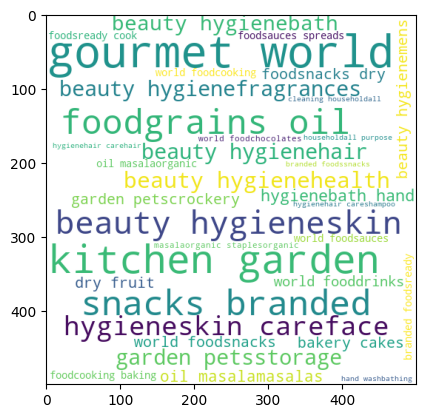

In [14]:
from wordcloud import WordCloud

wc = WordCloud(width = 500,height = 500,min_font_size = 10,background_color = 'white')

word_cloud = wc.generate(df_2['combined_text'].str.cat(sep = ' '))
plt.imshow(word_cloud)

In [15]:
df_2['combined_text'][1]

'kitchen garden petsstorage accessorieswater fridge bottleswater bottle orange'

In [16]:
df_2

,product,sale_price,market_price,rating,combined_text
0,garlic oil vegetarian capsule mg,220.00,220.0,4.1,beauty hygienehair carehair oil serumgarlic oi...
1,water bottle orange,180.00,180.0,2.3,kitchen garden petsstorage accessorieswater fr...
2,brass angle deep plain,119.00,250.0,3.4,cleaning householdpooja needslamp lamp oilbras...
3,cereal flip lid containerstorage jar assorted ...,149.00,176.0,3.7,cleaning householdbins bathroom warelaundry st...
4,creme soft soap hands body,162.00,162.0,4.4,beauty hygienebath hand washbathing bars soaps...
...,...,...,...,...,...
27550,wottagirl perfume spray heaven classic,199.20,249.0,3.9,beauty hygienefragrances deosperfumewottagirl ...
27551,rosemary,67.50,75.0,4.0,gourmet world foodcooking baking needsherbs se...
27552,periperi sweet potato chips,200.00,200.0,3.8,gourmet world foodsnacks dry fruits nutsnachos...
27553,green tea pure original,396.00,495.0,4.2,beveragesteatea bagsgreen tea pure original


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_2['combined_text'])



# Prediction
Making a function for the recommendations of a particular product In the below cell we have made a function to get the recommendations from with the help of cosine similarity matrix we will be able to find the products with the highest cosine similarity score

In [18]:
def recommend_by_description(description, k=20, threshold=0.1):
    """
    Recommend products based on a description with a similarity score threshold.
    
    Parameters:
        description (str): Custom description to query.
        k (int): Number of recommendations to return.
        threshold (float): Minimum similarity score to include in results.
    
    Returns:
        DataFrame: Filtered recommendations exceeding the similarity threshold.
    """
    # Transform the input description using the same TF-IDF vectorizer
    query_vector = tfidf.transform([description])
    
    # Compute similarity scores
    sim_scores = cosine_similarity(query_vector, tfidf_matrix).flatten()
    
    # Filter by threshold
    sim_indices = np.argsort(sim_scores)[::-1]  # Sort in descending order
    filtered_indices = [i for i in sim_indices if sim_scores[i] >= threshold]
    
    # Return the top-k results
    filtered_indices = filtered_indices[:k]
    return df.iloc[filtered_indices], sim_scores[filtered_indices]

# Example: Recommend based on a custom description with a similarity score threshold
custom_description = input('Enter product name: ')
threshold = 0.1  # Set your desired threshold
recommended_products, scores = recommend_by_description(custom_description, k=20, threshold=threshold)

# Display the results
for i in recommended_products['product']:
    print(i)


Enter product name:  namkeen


Mullu Murukku Namkeen
Roasted - Multigrain-Minty Namkeen
Roasted Namkeen - Flaxseed, Chili, Lime
Snack Namkeen Roasted - Seeds Trail Mix, Masala
